In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [16]:
heart_dataset=pd.read_csv("heart.csv")

In [3]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
#DATA NORMLIZATION
features_to_normalize = ['age','chol','thalach','sex','cp','trestbps','fbs','restecg','exang','oldpeak','slope','ca','thal']
for feature in features_to_normalize:
    max_value = heart_dataset[feature].max()
    min_value = heart_dataset[feature].min()
    heart_dataset[feature] = (heart_dataset[feature] - min_value) / (max_value - min_value)
    
    
print(heart_dataset.head())    
    

        age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.479167  1.0  0.0  0.292453  0.196347  0.0      0.5  0.740458    0.0   
1  0.500000  1.0  0.0  0.433962  0.175799  1.0      0.0  0.641221    1.0   
2  0.854167  1.0  0.0  0.481132  0.109589  0.0      0.5  0.412214    1.0   
3  0.666667  1.0  0.0  0.509434  0.175799  0.0      0.5  0.687023    0.0   
4  0.687500  0.0  0.0  0.415094  0.383562  1.0      0.5  0.267176    0.0   

    oldpeak  slope    ca      thal  target  
0  0.161290    1.0  0.50  1.000000       0  
1  0.500000    0.0  0.00  1.000000       0  
2  0.419355    0.0  0.00  1.000000       0  
3  0.000000    1.0  0.25  1.000000       0  
4  0.306452    0.5  0.75  0.666667       0  


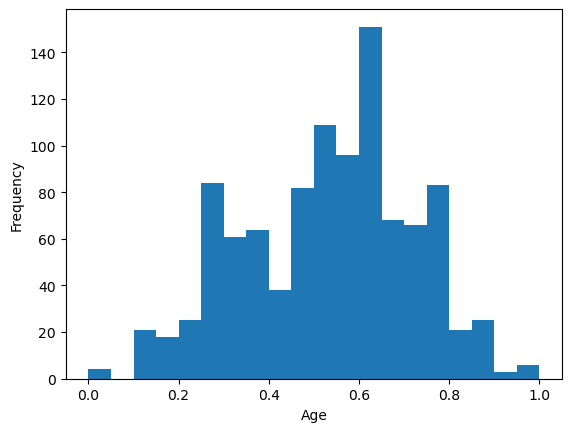

In [12]:
#HISTOGRAM FOR AGE COLUMN
plt.hist(heart_dataset['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [6]:
#MEAN AND STANDARD DEVIATION OF AGE
age_mean = heart_dataset['age'].mean()
age_std = heart_dataset['age'].std()

In [7]:
#threshold for outliers to 3 standard deviations from the mean
threshold = age_mean + (3 * age_std)

In [8]:
#Identify outliers in the 'age' column
outliers = heart_dataset[heart_dataset['age'] > threshold]

In [9]:
#print outliers detected in the 'age' column
print(f"Number of outliers detected in 'age' column: {len(outliers)}")

Number of outliers detected in 'age' column: 0


In [17]:
X = heart_dataset.iloc[:, :-1].values
y = heart_dataset.iloc[:, -1].values

# Standardize the features
sc = StandardScaler()
X = sc.fit_transform(X)

# Perform PCA
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict using the trained model
y_pred = lr.predict(X_test)

# Evaluate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("confusion matrix:",conf_matrix)






Accuracy: 0.7902439024390244
confusion matrix: [[75 27]
 [16 87]]


In [11]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

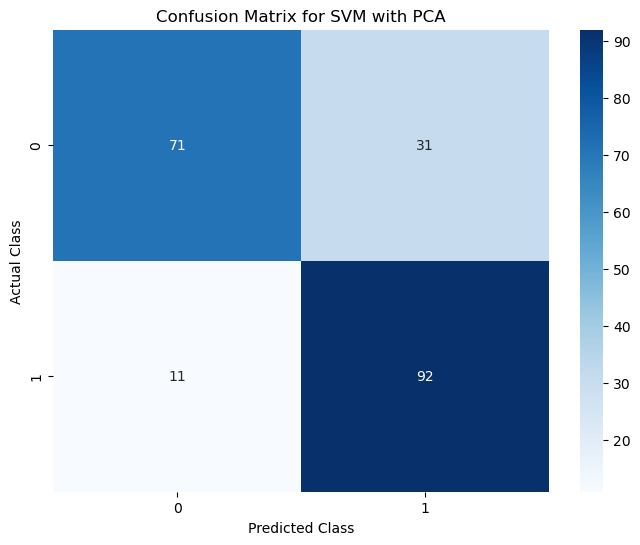

Accuracy 0.7951219512195122
[[71 31]
 [11 92]]


In [18]:


# separate the features and target
X = heart_dataset.drop('target', axis=1)
y = heart_dataset['target']

# apply PCA to reduce the number of features
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X)

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# initialize the SVM classifier
svm = SVC(kernel='linear')

# fit the model on the training data
svm.fit(X_train, y_train)

# make predictions on the test data
y_pred = svm.predict(X_test)

# create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix for SVM with PCA')
plt.show()

#print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy",accuracy)
cm = confusion_matrix(y_test, y_pred)
print(cm)



C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


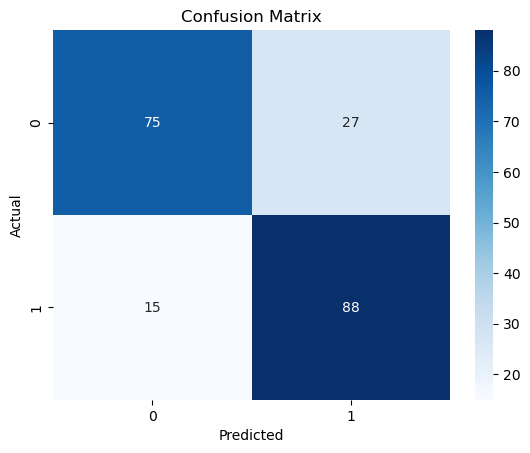

Accuracy: 79.51%
[[75 27]
 [15 88]]


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset


# Split the data into input features and target variable
X = heart_dataset.drop(columns=['target'])
y = heart_dataset['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce the dimensionality of the input features
pca = PCA(n_components=8)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create the ANN classifier
classifier = MLPClassifier(hidden_layer_sizes=(8, 4), max_iter=500, random_state=42)

# Train the ANN classifier on the training data
classifier.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = classifier.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))
cm = confusion_matrix(y_test, y_pred)
print(cm)


Accuracy: 0.7560975609756098
[[73 29]
 [21 82]]


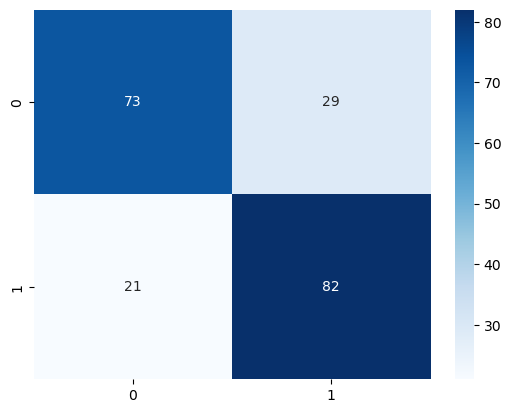

In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Load the dataset


# Split the data into features and target
X = heart_dataset.iloc[:, :-1]
y = heart_dataset.iloc[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Apply Naive Bayes on the reduced data
clf = GaussianNB()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
cm = confusion_matrix(y_test, y_pred)
print(cm)


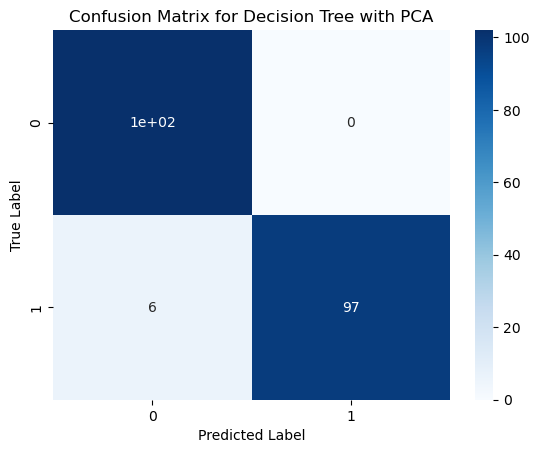

Accuracy: 0.97
[[102   0]
 [  6  97]]


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
heart_dataset = pd.read_csv('heart.csv')

# Separate features and target
X = heart_dataset.drop('target', axis=1)
y = heart_dataset['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train_pca, y_train)

# Test the model
y_pred = model.predict(X_test_pca)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix for Decision Tree with PCA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print(cm)


Accuracy: 0.9853658536585366
[[102   0]
 [  3 100]]


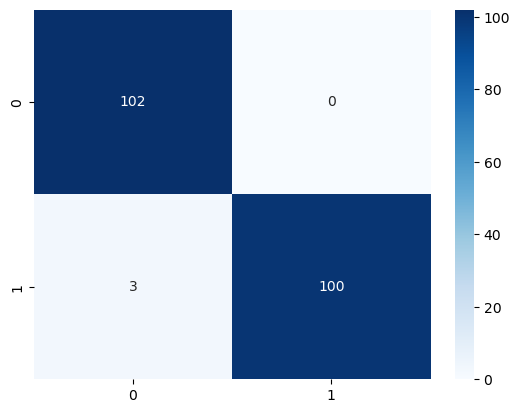

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
heart_dataset = pd.read_csv('heart.csv')

# Split data into features and target
X = heart_dataset.iloc[:, :-1]
y = heart_dataset.iloc[:, -1]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA to reduce feature dimensionality
pca = PCA(n_components=8)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create a random forest classifier and fit it to the training data
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions using the test data
y_pred = rf_classifier.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print(cm)


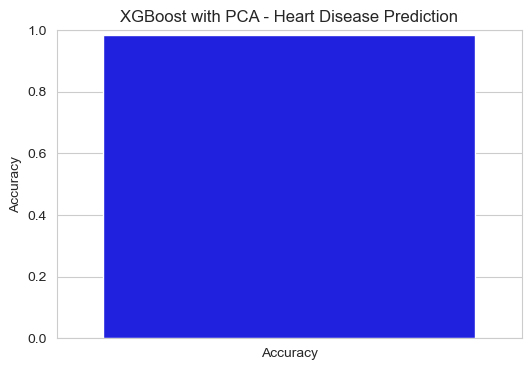

Accuracy: 0.9853658536585366
confusion matrix [[102   0]
 [  3 100]]


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

# Separate the features (X) and the target variable (y)
X = heart_dataset.drop(['target'], axis=1)
y = heart_dataset['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Apply PCA to reduce the number of features
pca = PCA(n_components=8)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Train the XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Predict the target values
y_pred = model.predict(X_test)

# Compute the confusion matrix and the accuracy score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

# Display the confusion matrix and the accuracy score in a bar plot
sns.set_style('whitegrid')
plt.figure(figsize=(6, 4))
sns.barplot(x=['Accuracy'], y=[acc], color='blue')
plt.title('XGBoost with PCA - Heart Disease Prediction')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("confusion matrix",cm)



In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the heart disease dataset


# Split the dataset into features and target
X = heart_dataset.iloc[:, :-1].values
y = heart_dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=8)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create an AdaBoost classifier and train it on the training set
clf = AdaBoostClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate the confusion matrix and accuracy score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

# Print the confusion matrix and accuracy score
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", acc)


Confusion Matrix:
 [[ 96   6]
 [  3 100]]
Accuracy Score: 0.9560975609756097
